# ~ RAMANMEHTA7

# Dataset - http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

In [1]:
#Various models required
import numpy as np
import pandas as pd
import os
from sklearn import model_selection
import re,string
import matplotlib.pyplot as plt

In [2]:
#This are stop_words in common taken from intenet.
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [3]:
#X is a list further made in form of tuple , where first element is name of document and second is the text article in documents.
#Y is the category
X = [] 
Y = []
for category in os.listdir("20_newsgroups/20_newsgroups/"):
    for document in os.listdir("20_newsgroups/20_newsgroups/"+category):
        with open("20_newsgroups/20_newsgroups/"+category+'/'+document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [5]:
#splitting the data in training and testing data points
x_train,x_test,y_train,y_test = model_selection.train_test_split(X,Y)

In [6]:
#split has done in nearly 3:1 ratio
print(len(x_train))
print(len(x_test))

14997
5000


In [8]:
#Making Dictionary of words with their corresponding frequency
dic={}
for i in range(len(x_train)):
    #first index is the text in document
    word = x_train[i][1].lower()
    #splitting the text into words
    stripped = re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 such as symbols in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s) <= 2:
            continue
        if s in dic:
            dic[s] += 1
        else:
            dic[s] = 1
dic

{'newsgroups': 15321,
 'talk': 9246,
 'politics': 5897,
 'guns': 1918,
 'path': 15295,
 'cantaloupe': 19518,
 'srv': 24216,
 'cmu': 39086,
 'edu': 123054,
 'magnesium': 3237,
 'club': 3410,
 'news': 25912,
 'sei': 4596,
 'cis': 4268,
 'ohio': 11879,
 'state': 14106,
 'pacific': 790,
 'mps': 6869,
 'zaphod': 6200,
 'sdd': 1046,
 'com': 37649,
 'think': 6144,
 'paperboy': 25,
 'osf': 148,
 'org': 3958,
 'dswartz': 8,
 'dan': 498,
 'swartzendruber': 5,
 'subject': 16176,
 'atf': 371,
 'message': 16427,
 'sender': 8321,
 'usenet': 6395,
 'system': 4656,
 'organization': 14870,
 'open': 1063,
 'software': 2224,
 'foundation': 199,
 'research': 1715,
 'institute': 1008,
 'references': 9841,
 'cbnews': 107,
 'att': 1721,
 'distribution': 3554,
 'usa': 2633,
 'date': 15598,
 'tue': 1816,
 'apr': 15347,
 'gmt': 13359,
 'lines': 15639,
 'comments': 537,
 'botched': 16,
 'handling': 147,
 'case': 2119,
 'attempting': 109,
 'storm': 71,
 'compound': 380,
 'broad': 96,
 'daylight': 21,
 'explanatio

In [9]:
#Sorting the dictionary on basis of frequency of words in reverse order to get top 'K' most frequent words
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 123054),
 ('cmu', 39086),
 ('com', 37649),
 ('news', 25912),
 ('not', 25084),
 ('srv', 24216),
 ('cantaloupe', 19518),
 ('net', 19240),
 ('message', 16427),
 ('subject', 16176),
 ('lines', 15639),
 ('date', 15598),
 ('apr', 15347),
 ('newsgroups', 15321),
 ('path', 15295),
 ('organization', 14870),
 ('can', 14825),
 ('state', 14106),
 ('gmt', 13359),
 ('ohio', 11879),
 ('one', 11799),
 ('will', 11410),
 ('writes', 11110),
 ('article', 10120),
 ('references', 9841),
 ('comp', 9670),
 ('talk', 9246),
 ('misc', 8786),
 ('ans', 8344),
 ('sender', 8321),
 ('howland', 8271),
 ('reston', 8256),
 ('don', 7902),
 ('people', 7805),
 ('like', 7794),
 ('university', 7553),
 ('just', 7498),
 ('posting', 7399),
 ('nntp', 7063),
 ('know', 6890),
 ('mps', 6869),
 ('host', 6712),
 ('get', 6448),
 ('sci', 6419),
 ('usenet', 6395),
 ('zaphod', 6200),
 ('think', 6144),
 ('may', 6101),
 ('alt', 5988),
 ('politics', 5897),
 ('also', 5638),
 ('windows', 5591),
 ('time', 5313),
 ('eng', 5209),
 ('har

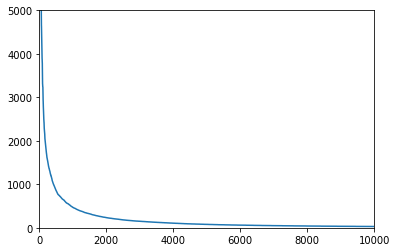

In [34]:
#Plotting graph on number of words vs frequency
#On basis of graph we can decide the top 'k' number of features we want to take
features = sorted_dic
#new list to plot frequency graph
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,10000,1,5000])
plt.show()   


In [12]:
#We decided to take top 2000 words with max freuqency as our feature
#here feature list is answer1
#i am using list comprehension
answer1 = [features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'organization',
 'can',
 'state',
 'gmt',
 'ohio',
 'one',
 'will',
 'writes',
 'article',
 'references',
 'comp',
 'talk',
 'misc',
 'ans',
 'sender',
 'howland',
 'reston',
 'don',
 'people',
 'like',
 'university',
 'just',
 'posting',
 'nntp',
 'know',
 'mps',
 'host',
 'get',
 'sci',
 'usenet',
 'zaphod',
 'think',
 'may',
 'alt',
 'politics',
 'also',
 'windows',
 'time',
 'eng',
 'harvard',
 'near',
 'use',
 'rutgers',
 'new',
 'rec',
 'soc',
 'noc',
 'system',
 'crabapple',
 'good',
 'sei',
 'das',
 'well',
 'xref',
 'even',
 'now',
 'cis',
 'see',
 'europa',
 'gtefsd',
 'ece',
 'way',
 'religion',
 'uunet',
 'org',
 'world',
 'god',
 'first',
 'two',
 'say',
 'christian',
 'gov',
 'much',
 'many',
 'make',
 'rochester',
 'right',
 'distribution',
 'max',
 'mail',
 'club',
 'space',
 'culture',
 'said',
 'gatech',
 'sun',
 'andrew',

In [13]:
#Making x_train dataset
#Number of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)
x_train_dataset = np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [14]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [15]:
#printing x_train and x_test dataset 
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)

[[ 6  3  3 ...  0  0  0]
 [ 8  2  5 ...  0  0  0]
 [ 6  1  4 ...  0  0  0]
 ...
 [12  4  0 ...  0  0  0]
 [ 6  5  4 ...  0  0  0]
 [ 9  4 10 ...  0  0  0]]
--------------------------
[[ 7  5  1 ...  0  0  0]
 [10  2  0 ...  0  0  0]
 [ 5  4  1 ...  0  0  0]
 ...
 [ 2  1  0 ...  0  0  0]
 [ 5  1  0 ...  0  0  0]
 [10  2  0 ...  0  0  0]]


In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [17]:
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Score on training data: 0.8924451556978062
Score on testing data: 0.8558
[[214   0   1   0   0   0   3   2   1   0   0   0   1   0   1   1   1   2
    0  35]
 [  0 185  13  13   5   6   6   4   1   0   0   0   6   0   2   0   0   0
    0   0]
 [  0   4 211  19   1  21   3   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  1   3   3 217  33   2   5   0   1   0   0   0   8   0   0   0   0   0
    0   0]
 [  0   1   0  16 215   0   5   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0  16  25   8   3 196   2   0   0   0   0   1   1   0   2   0   0   0
    0   0]
 [  0   1   0   4   1   1 249   7   1   0   0   0   6   0   1   0   1   0
    1   0]
 [  0   1   0   0   0   0   3 216   9   1   1   0   3   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   4   1 216   1   0   0   1   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   4   4 193  14   0   0   0   1   0   1   0
    0   0]
 [  0   0   0   0   0   0   1   0   0   8 219   0   0   0   0   0   0   0
   

# Self Implementation of Naive Baye's

In [18]:
#Making dictionary for implementing Naive Baye's
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count


In [19]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob
    

In [20]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [21]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [22]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [23]:
#This cell will take time to execute
dictionary=fit(x_train_dataset,y_train)
y_pred=predict_(x_test_dataset,dictionary)


In [24]:
dictionary

{'total_doc': 14997,
 'rec.sport.hockey': {'edu': 5795,
  'cmu': 1884,
  'com': 1051,
  'news': 1412,
  'not': 787,
  'srv': 952,
  'cantaloupe': 777,
  'net': 953,
  'message': 801,
  'subject': 809,
  'lines': 799,
  'date': 795,
  'apr': 803,
  'newsgroups': 778,
  'path': 774,
  'organization': 783,
  'can': 559,
  'state': 696,
  'gmt': 644,
  'ohio': 582,
  'one': 451,
  'will': 680,
  'writes': 506,
  'article': 424,
  'references': 522,
  'comp': 0,
  'talk': 32,
  'misc': 9,
  'ans': 421,
  'sender': 439,
  'howland': 419,
  'reston': 418,
  'don': 466,
  'people': 197,
  'like': 359,
  'university': 530,
  'just': 339,
  'posting': 396,
  'nntp': 411,
  'know': 282,
  'mps': 348,
  'host': 376,
  'get': 360,
  'sci': 0,
  'usenet': 281,
  'zaphod': 319,
  'think': 377,
  'may': 133,
  'alt': 1,
  'politics': 1,
  'also': 196,
  'windows': 2,
  'time': 289,
  'eng': 223,
  'harvard': 303,
  'near': 275,
  'use': 33,
  'rutgers': 4,
  'new': 324,
  'rec': 862,
  'soc': 4,
  'no

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

In [26]:
print("Score on testing_data:",score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Score on testing_data: 0.8666
[[231   0   1   0   0   0   2   1   1   0   0   0   0   0   0   0   0   0
    1  25]
 [  0 194   5  14   6   4   6   2   0   0   0   0   6   3   1   0   0   0
    0   0]
 [  0  11 187  27   0  29   2   0   0   0   0   3   2   0   0   0   0   0
    0   0]
 [  0   6   3 227  28   1   4   0   0   0   0   1   3   0   0   0   0   0
    0   0]
 [  0   2   0  16 215   1   4   0   0   0   0   0   0   1   0   0   0   0
    0   0]
 [  0  20  24   3   0 204   0   0   1   0   0   0   1   1   0   0   0   0
    0   0]
 [  0   1   2   5   1   1 249   6   1   0   0   0   4   1   1   0   1   0
    0   0]
 [  0   0   0   0   0   0   6 216   4   0   0   0   7   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   2   2 220   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   1   3 200  14   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   1   7 220   0   0   0   0   0   0   0
    0   0]
 [  0   1   0   0   1   1   0   0  

RESULT:

We have performed text-classification both by sklearn and self implementation.

We found out that sklearn gave score of 0.8602 on testing_data,whereas self implemented classifier gave 0.876 on testing data,which is very close.

